# Regression in Python

***
A quick demo of logistic regression techniques in SKLearn. ***

In [2]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn as sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [3]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
boston.data.shape

(506, 13)

In [6]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let's explore the data set itself. 

In [8]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [9]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [10]:
print(boston.target.shape)

(506,)


In [11]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [12]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5, 1.0, 'Relationship between Pupil-Teacher Ratio and Price')

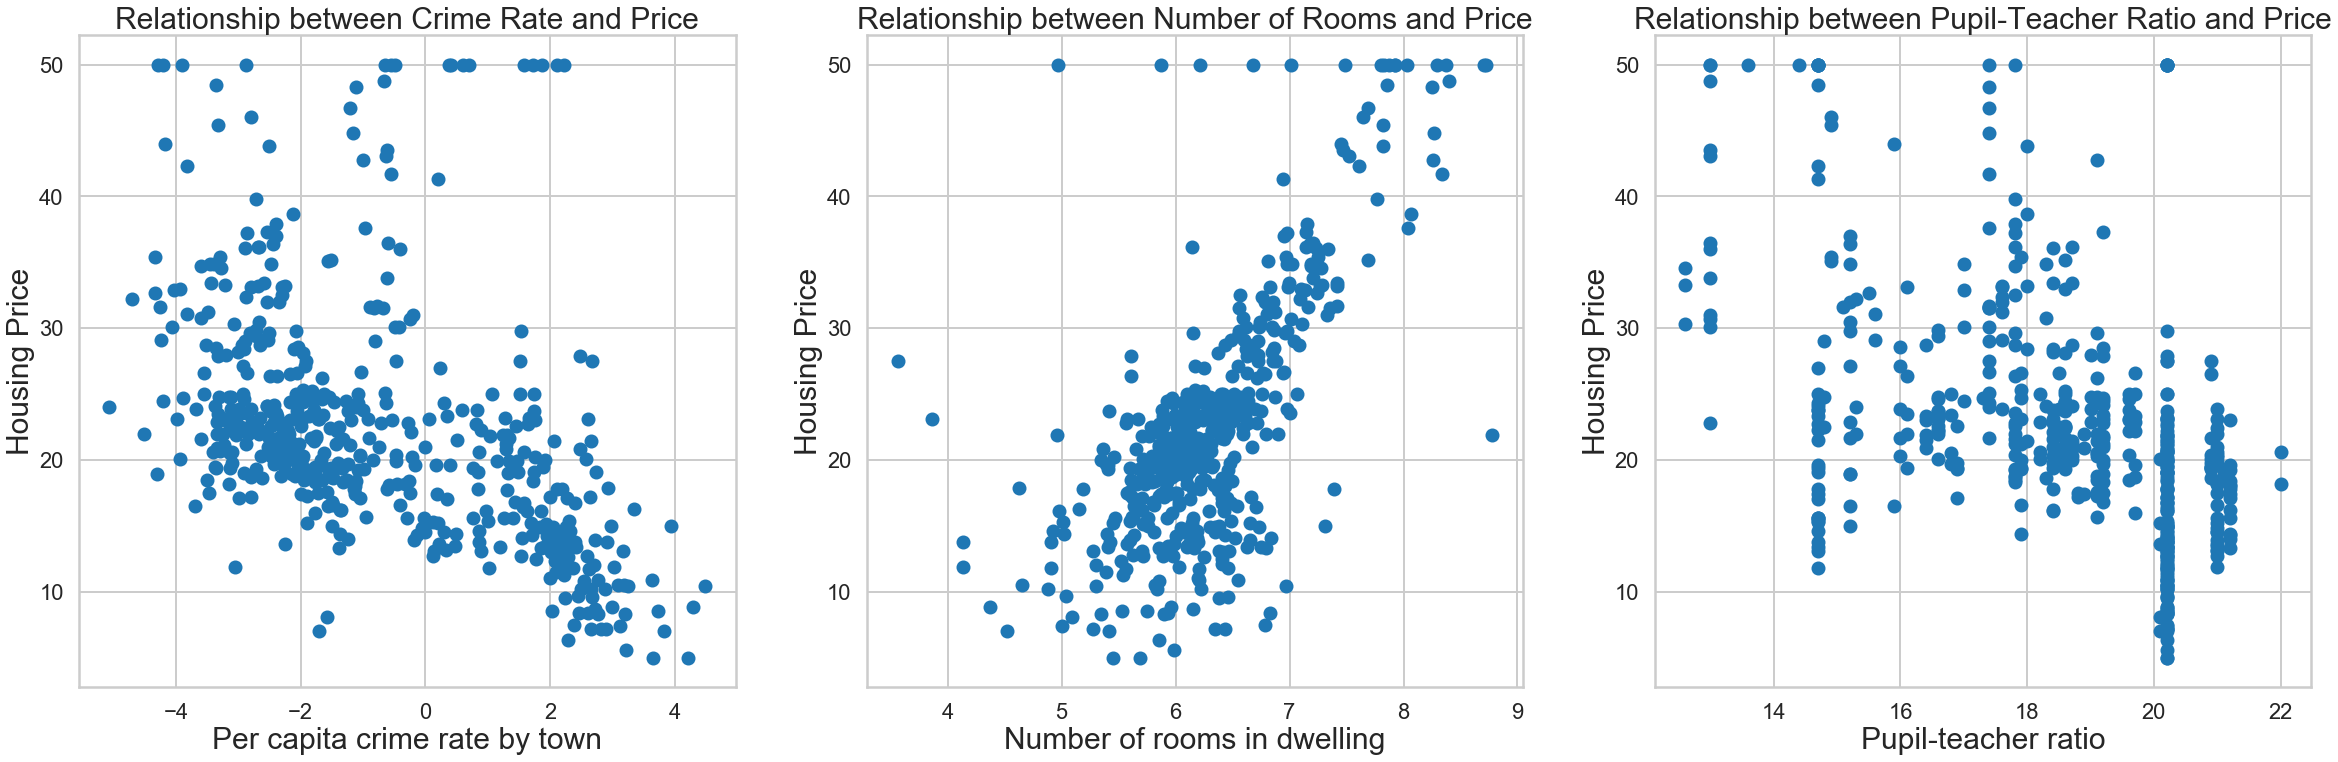

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(40,12))
ax1.scatter(np.log(bos.CRIM), bos.PRICE)
ax1.set_xlabel("Per capita crime rate by town", fontsize=30)
ax1.set_ylabel("Housing Price", fontsize=30)
ax1.set_title("Relationship between Crime Rate and Price", fontsize=30)

ax2.scatter(bos.RM, bos.PRICE)
ax2.set_xlabel("Number of rooms in dwelling", fontsize=30)
ax2.set_ylabel("Housing Price", fontsize=30)
ax2.set_title("Relationship between Number of Rooms and Price", fontsize=30)

ax3.scatter(bos.PTRATIO, bos.PRICE)
ax3.set_xlabel("Pupil-teacher ratio", fontsize=30)
ax3.set_ylabel("Housing Price", fontsize=30)
ax3.set_title("Relationship between Pupil-Teacher Ratio and Price", fontsize=30)


Crime rates (as a log) appear to have a linear negative relationship with price (possibly some form of exponential). When crime is low, property prices are variable. However, property prices become more predictably lower as crime increases.

Number of rooms have a strong positive, largely linear relationship with house price. The most expensive houses show some outliers. There may also be some larger spread in price for the smaller houses.

The pupil-teacher ratio has possibly a small negative effect on house price. 

Now to look at the accessibility and tax variables.



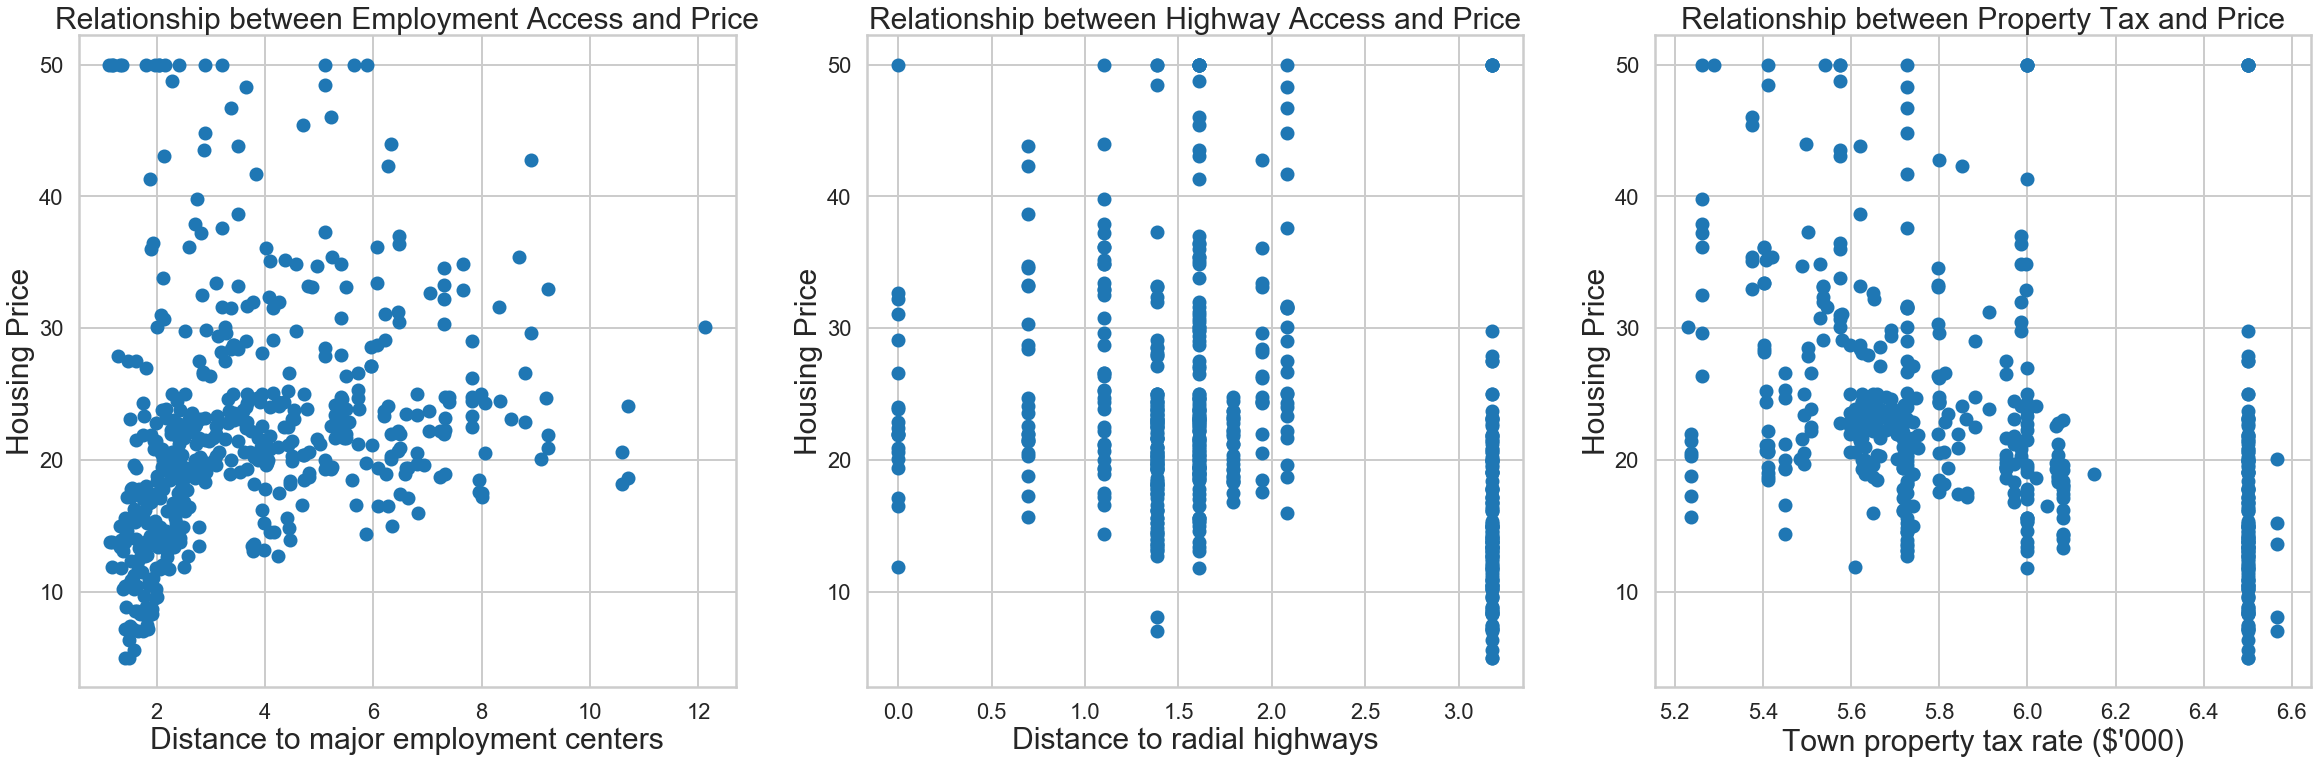

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(40,12))
ax1.scatter(bos.DIS, bos.PRICE)
ax1.set_xlabel("Distance to major employment centers", fontsize=30)
ax1.set_ylabel("Housing Price", fontsize=30)
ax1.set_title("Relationship between Employment Access and Price", fontsize=30)

ax2.scatter(np.log(bos.RAD), bos.PRICE)
ax2.set_xlabel("Distance to radial highways", fontsize=30)
ax2.set_ylabel("Housing Price", fontsize=30)
ax2.set_title("Relationship between Highway Access and Price", fontsize=30)

ax3.scatter(np.log(bos.TAX), bos.PRICE)
ax3.set_xlabel("Town property tax rate ($'000)", fontsize=30)
ax3.set_ylabel("Housing Price", fontsize=30)
_ = ax3.set_title("Relationship between Property Tax and Price", fontsize=30)


***

Housing prices appear depressed nearer to employment centers (but there are exceptions like Beacon Hill).

When plotting the log-distance, places far away from radial highways are slightly cheaper, on the whole.

When plotting the log-taxrate, there appers to be a weak negative relationship between property tax and price values. Buy a cheap house in a rich town, you'll pay less.

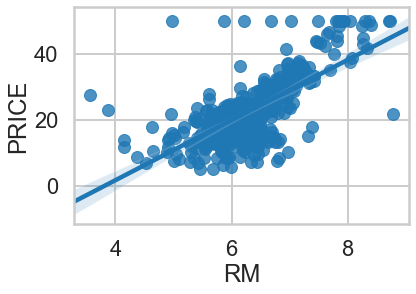

In [15]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


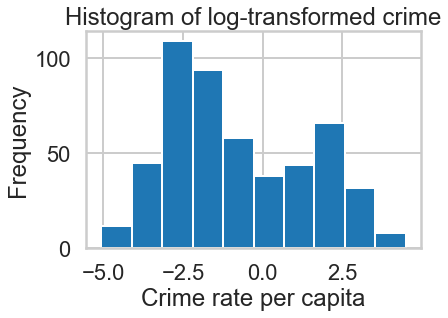

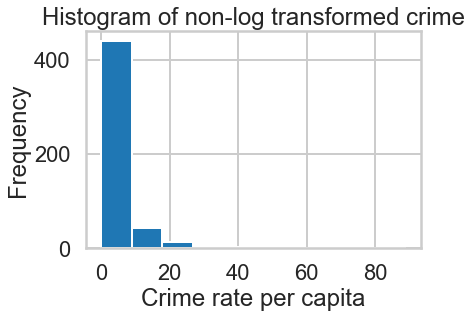

In [16]:
plt.hist(np.log(bos.CRIM))
plt.title("Histogram of log-transformed crime")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

plt.hist(bos.CRIM)
plt.title("Histogram of non-log transformed crime")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

Taking the log of crime rates removed the heavy right skew in the distribution (see above).

Below are the density plots of three standardized variables as an alternative way of looking at correlations. 

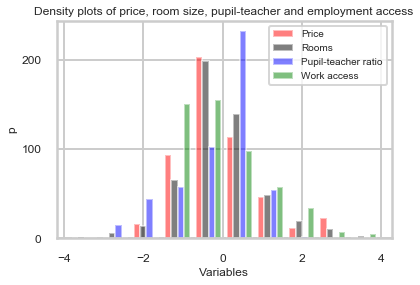

In [17]:
bos['PRICE_z']=(bos.PRICE - np.mean(bos.PRICE))/np.std(bos.PRICE)
bos['RM_z'] = (bos.RM - np.mean(bos.RM))/np.std(bos.RM)
bos['PTRATIO_z'] = (bos.PTRATIO - np.mean(bos.PTRATIO))/np.std(bos.PTRATIO)
bos['DIS_z'] = (bos.DIS - np.mean(bos.DIS))/np.std(bos.DIS)

plt.hist([bos.PRICE_z, bos.RM_z, bos.PTRATIO_z, bos.DIS_z], alpha=.5, 
         color=['red', 'black', 'blue', 'green'])
plt.title("Density plots of price, room size, pupil-teacher and employment access", fontsize = 12)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("p", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Price', 'Rooms', 'Pupil-teacher ratio', 'Work access'], loc='upper right', fontsize=10)
plt.show()


Fitting the regression using statsmodels

In [18]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [19]:
# specifying the model and fitting
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 19 Nov 2019   Prob (F-statistic):           2.49e-74
Time:                        08:38:16   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

Below is a plot of actual and predicted house prices. The model seems to underpredict the value of the most expensive houses and also has high variability in predicting the lowest values.

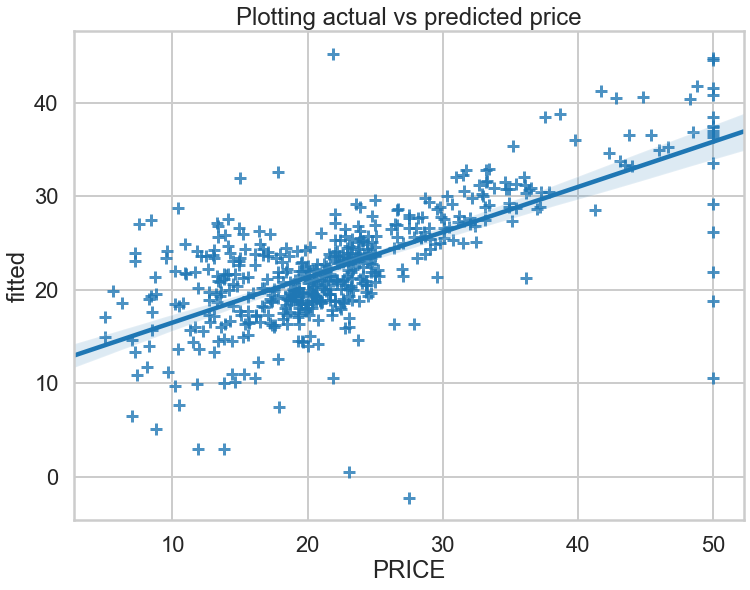

In [20]:
bos['fitted']=m.fittedvalues
plt.figure(figsize=(12,9))
sns.regplot(y="fitted", x="PRICE", data=bos, fit_reg = True, marker='+')
_ = plt.title('Plotting actual vs predicted price')

### Fitting Linear Regression using `sklearn`


In [21]:
from sklearn.linear_model import LinearRegression
X = pd.DataFrame(boston.data)
X.columns = boston.feature_names
print(X.head())
# This creates a LinearRegression object
lm = LinearRegression()
lm

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Note 1: To drop the intercept term you simply set fit_intercept to False. We will keep the intercept in this model because even vacant land has a price.

Note 2: To satisfy the requirement for i.i.d residuals, normality is not enough. We need normality with equal variances for each level of the variables.

Note 3: Y does not need to be normally distributed for linear regression to work. If there is unevenness in the predictors, we expect unevenness in Y. 

In [23]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.459488385089855


In [24]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [25]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [26]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

I've plotted a histogram of the predicted prices below, along with the mean and 95% confidence interval. These predicted prices are slightly right skewed but close to normal. This will not match the actual prices (which were heavily right-skewed).

The scatterplot of actual versus predicted prices (also below) bear out the same story.

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

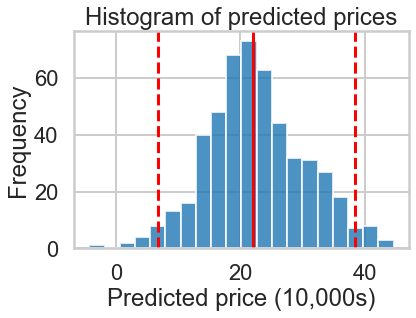

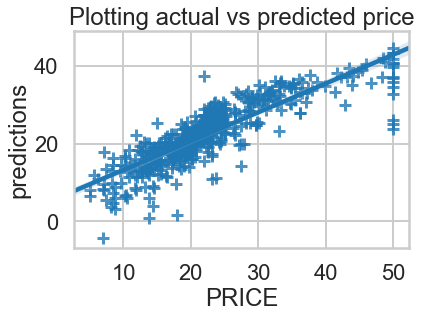

In [27]:
# your turn
predictions = lm.predict(X)
percentiles = np.percentile(predictions, [2.5, 50, 97.5])
_ = plt.hist(predictions, alpha=0.8, bins='auto')
_ = plt.title('Histogram of predicted prices')
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Predicted price (10,000s)')
_ = plt.axvline(percentiles[0], color='red', linestyle='--')
_ = plt.axvline(percentiles[1], color='red', linestyle='-')
_ = plt.axvline(percentiles[2], color='red', linestyle='--')
plt.show()

bos['predictions'] = lm.predict(X)
#plt.figure(figsize=(12,9))
sns.regplot(y="predictions", x="PRICE", data=bos, fit_reg = True, marker='+')
_ = plt.title('Plotting actual vs predicted price')



Residual sum of squares 


In [28]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954977


Explained sum-of-squares.

In [29]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2))

31637.510837064714


<h3>Part 3 Checkup Exercise Set IV</h3>

Below I predict housing price by pupil-teacher ratio only. This had an intercept of 62 and a beta coefficient of -2.15. For each extra student per classroom, house prices go down by around $2000.

$R^2$ is quite low at 0.26. This is not a surprise given we are using only one predictor.

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>
The F-statistic is very large, and will be statistically significant. This means that the model has an effect compared to no model at all. The model, even though reduced to one variable, still helps in predicting house prices.

Note: The F statistic is the square of the t-statistic


In [30]:
# Setting up the second regression
lm2 = LinearRegression()
# Get the right predictor as df
X_PT = X.loc[:,['PTRATIO']]
# Fit it
lm2.fit(X_PT, bos.PRICE)
# Print the coefficients
print('Estimated intercept coefficient: {}'.format(lm2.intercept_))
print('Estimated beta coefficient for pupil-teacher ratio: {}'.format(lm2.coef_))

# Computing R-square
# First get the predicted values
y_pred = lm2.predict(X_PT)
# Then get r-square
r2 = sklearn.metrics.r2_score(bos.PRICE, y_pred)
# Print it
print(f'r-squared is: {r2:0.2f}')

# RSS
rss = np.sum((bos.PRICE - y_pred) ** 2)
ess = np.sum((y_pred - np.mean(bos.PRICE)) ** 2)
msr = rss/1
mse = rss/(len(X_PT)-2)
f_ratio = msr/mse
print(f'The F-ratio is {f_ratio:0.2f}')

Estimated intercept coefficient: 62.34462747483265
Estimated beta coefficient for pupil-teacher ratio: [-2.1571753]
r-squared is: 0.26
The F-ratio is 504.00


<div class="span5 alert alert-info">
<h3>Fitting a model with crime, number of rooms, and pupil-teacher ratio</h3>

I fit the regression with sklearn and also with statsmodels (the latter gives better summary statistics)

The F-value was 234.66, which is highly significant. This indicates the model has predictive power.
The $R^2$ was up to 0.59 (consistent between both sklearn and statsmodels). This is significantly more than the pupil-teacher ratio alone.

All individual predictors were significant predictors of house price. As crime and pupil-teacher ratio go down, estimated house prices increase. As number of rooms increases, estimated house prices increase.

In [31]:
# Setting up the second regression
lm3 = LinearRegression()
# Get the right predictor as df
X_PT2 = X.loc[:,['PTRATIO', 'CRIM', 'RM']]
# Fit it
lm3.fit(X_PT2, bos.PRICE)

# Computing R-square
# First get the predicted values
y_pred2 = lm3.predict(X_PT2)
# Then get r-square
r2 = sklearn.metrics.r2_score(bos.PRICE, y_pred2)
# Print it
print(f'r-squared is: {r2:0.2f}')

pd.DataFrame({'features': X_PT2.columns, 'estimatedCoefficients': lm3.coef_})[['features', 'estimatedCoefficients']]

# Doing the same with statsmodels to get F-tests for individual predictors
model3 = ols('PRICE ~ CRIM + PTRATIO + RM',bos).fit()
print(model3.summary())

r-squared is: 0.59
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Tue, 19 Nov 2019   Prob (F-statistic):           6.15e-98
Time:                        08:38:18   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034 

For the sake of the argument, let's include access to employment centers in the model as per below.

In [32]:
# Doing the same with statsmodels to get F-tests for individual predictors
model_4 = ols('PRICE ~ CRIM + PTRATIO + RM + DIS',bos).fit()
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     183.5
Date:                Tue, 19 Nov 2019   Prob (F-statistic):           1.04e-96
Time:                        08:38:18   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3234.
Df Residuals:                     501   BIC:                             3255.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.4333      4.076     -0.842      0.4

We can then compare the models by the F-test below and also by looking at the AIC for both models. The AIC for the three-predictor model was 3232 and the AIC for the 4-predictor model was 3234. We have not improved our prediction by adding this predictor. 
The ANOVA test between models does not suggest the 4-predictor model is better than the 3-predictor model (F = 0.01, p = 0.91).

In [33]:
anova_results = anova_lm(model3, model_4)
print(anova_results)

   df_resid           ssr  df_diff   ss_diff         F    Pr(>F)
0     502.0  17328.237120      0.0       NaN       NaN       NaN
1     501.0  17327.805545      1.0  0.431575  0.012478  0.911102


/Users/jonathangerber/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/jonathangerber/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/jonathangerber/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<h3>Checking assumptions</h3>

The fitted values versus residuals plot suggests a problem of prediction at high house prices. We are underpredicting the higher end. This indicates non-linearity in the original data.

The quantile plot (second plot below) shows this deviation from normality. The tails aren't right.

The advantage of the residual plot is that it shows the spread of the errors of predition a little better. We see that the right tail is underpredicted. The quantile plot shows deviations of shape more generally, and that couldn't be seen by a simple visual inspection.

While some might consider the mispredictions at the right edge to be outliers, they seem to be more of a non-linear pattern. There are a few other mid-priced houses that have very high residuals. These might reflect big houses in less affluent neighborhoods, for example.

I constructed a leverage plot and found that the three points of high leverage were all underpredicted by the model (see table below). Thus, perhaps removing these three and the high end values could help make the model more accurate.

We will run that below.

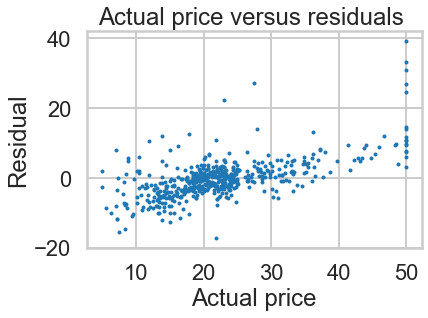

In [34]:
# Plotting actual versus residuals
plt.scatter(bos.PRICE, model3.resid, s=4)
_= plt.xlabel('Actual price')
_= plt.ylabel('Residual')
_= plt.title('Actual price versus residuals ')

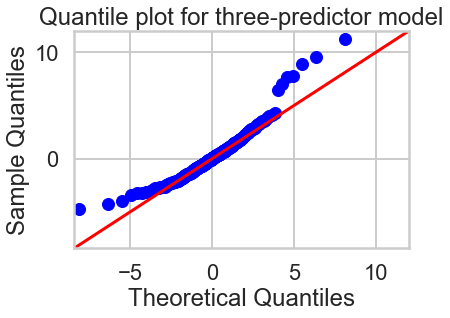

In [35]:
# Quantile plot
_= sm.qqplot(model3.resid, stats.t, fit=True, line='45')
_= plt.title('Quantile plot for three-predictor model')
_= plt.show()

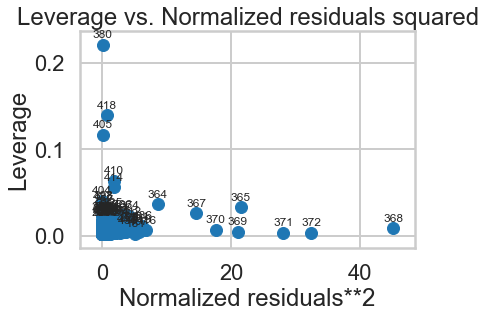

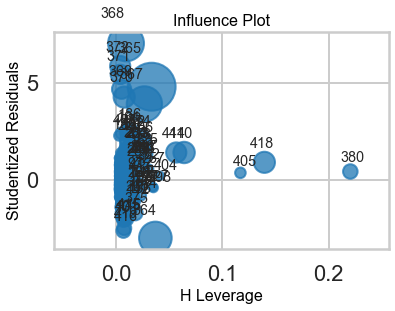

In [42]:
from statsmodels.graphics.regressionplots import *
_= plot_leverage_resid2(model3)
_= influence_plot(model3)


In [56]:
bos.iloc[[418, 405, 380]]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PRICE_z,RM_z,PTRATIO_z,DIS_z,fitted,predictions
418,73.5341,0.0,18.1,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62,8.8,-1.494644,-0.466767,0.806576,-0.947146,19.550642,6.147799
405,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0,-1.908226,-0.857124,0.806576,-1.126455,17.056665,8.211159
380,88.9762,0.0,18.1,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21,10.4,-1.320504,0.973563,0.806576,-1.130686,28.752875,14.369948




<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

In [66]:
# Remove the outliers and high leverage points
bos_red = bos.drop([418, 405, 380, 368, 371, 372, 365, 367, 369, 370], axis=0)
print(bos_red.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE   PRICE_z      RM_z  PTRATIO_z     DIS_z  \
0     15.3  396.90   4.98   24.0  0.159686  0.413672  -1.459000  0.140214   
1     17.8  396.90   9.14   21.6 -0.101524  0.194274  -0.303094  0.557160   
2     17.8  392.83   4.03   34.7  1.324247  1.282714  -0.303094  0.557160   
3     18.7  394.63   2.94   33.4  1.182758  1.016303   0.113032  1.077737   
4     18.7  396.90   5.33   36.2  1.487503  1.228577   0.113032  1.077737   

      fitted  predictions  
0  25.175746    30.003843  
1  23.774021    25.025562  
2  30.728032  

In [68]:
model5 = ols('PRICE ~ CRIM + PTRATIO + RM',bos_red).fit()
print(model5.summary())

anova_results = anova_lm(model3, model5)
print(anova_results)

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     414.5
Date:                Tue, 19 Nov 2019   Prob (F-statistic):          3.19e-134
Time:                        09:18:09   Log-Likelihood:                -1468.9
No. Observations:                 496   AIC:                             2946.
Df Residuals:                     492   BIC:                             2963.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0479      3.294     -1.836      0.0

The regression fit above was vastly improved by removing the outliers (and higher-valued properties). This can be seen in the higher $R^2$ (71.7% versus the original 59.4%), a lower AIC (~2950 vs ~3200), and a significant ANOVA test (F = 29.04, p < .0005).